# PROBLEM STATEMENT

LoanTap is an online platform committed to delivering customized loan products to millennials. They innovate in an otherwise dull loan segment, to deliver instant, flexible loans on consumer friendly terms to salaried professionals and businessmen.

The data science team at LoanTap is building an underwriting layer to determine the creditworthiness of MSMEs as well as individuals.

LoanTap deploys formal credit to salaried individuals and businesses 4 main financial instruments:

Personal Loan EMI Free Loan Personal Overdraft Advance Salary Loan This case study will focus on the underwriting process behind Personal Loan only

Problem Statement:

#### Given a set of attributes for an Individual, determine if a credit line should be extended to them. If so, what should the repayment terms be in business recommendations?

## Data description

loan_amnt : The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
term : The number of payments on the loan. Values are in months and can be either 36 or 60.
int_rate : Interest Rate on the loan
installment : The monthly payment owed by the borrower if the loan originates.
grade : LoanTap assigned loan grade
sub_grade : LoanTap assigned loan subgrade
emp_title :The job title supplied by the Borrower when applying for the loan.*
emp_length : Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
home_ownership : The home ownership status provided by the borrower during registration or obtained from the credit report.
annual_inc : The self-reported annual income provided by the borrower during registration.
verification_status : Indicates if income was verified by LoanTap, not verified, or if the income source was verified
issue_d : The month which the loan was funded
loan_status : Current status of the loan - Target Variable
purpose : A category provided by the borrower for the loan request.
title : The loan title provided by the borrower
dti : A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LoanTap loan, divided by the borrower’s self-reported monthly income.
earliest_cr_line :The month the borrower's earliest reported credit line was opened
open_acc : The number of open credit lines in the borrower's credit file.
pub_rec : Number of derogatory public records
revol_bal : Total credit revolving balance
revol_util : Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
total_acc : The total number of credit lines currently in the borrower's credit file
initial_list_status : The initial listing status of the loan. Possible values are – W, F
application_type : Indicates whether the loan is an individual application or a joint application with two co-borrowers
mort_acc : Number of mortgage accounts.
pub_rec_bankruptcies : Number of public record bankruptcies
Address: Address of the individual

In [255]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [256]:
df=pd.read_csv(r"C:\Users\Asus\Downloads\logistic_regression (1).csv")
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


## Basic data exploration

In [257]:
df.shape

(396030, 27)

In [258]:
#displaying all the columns in the Dataframe
pd.set_option('display.max_columns', 1000)
df.head(2)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"


In [259]:
#check columns and their datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [260]:
#check for any null values in the data
##check percentage of null values in each columns
df.isnull().sum()/df.shape[0]*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
dtype: float64

In [261]:
#check for categorical and non categorical variables in the data
df.nunique()

loan_amnt                 1397
term                         2
int_rate                   566
installment              55706
grade                        7
sub_grade                   35
emp_title               173105
emp_length                  11
home_ownership               6
annual_inc               27197
verification_status          3
issue_d                    115
loan_status                  2
purpose                     14
title                    48817
dti                       4262
earliest_cr_line           684
open_acc                    61
pub_rec                     20
revol_bal                55622
revol_util                1226
total_acc                  118
initial_list_status          2
application_type             3
mort_acc                    33
pub_rec_bankruptcies         9
address                 393700
dtype: int64

In [262]:
#check for any duplicates in the dataframe
df.duplicated().sum()

0

In [263]:
df.head(3)


,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"


# Exploratory data analysis


### Looking at distribution of defaulting and non defaulting customers across different categories

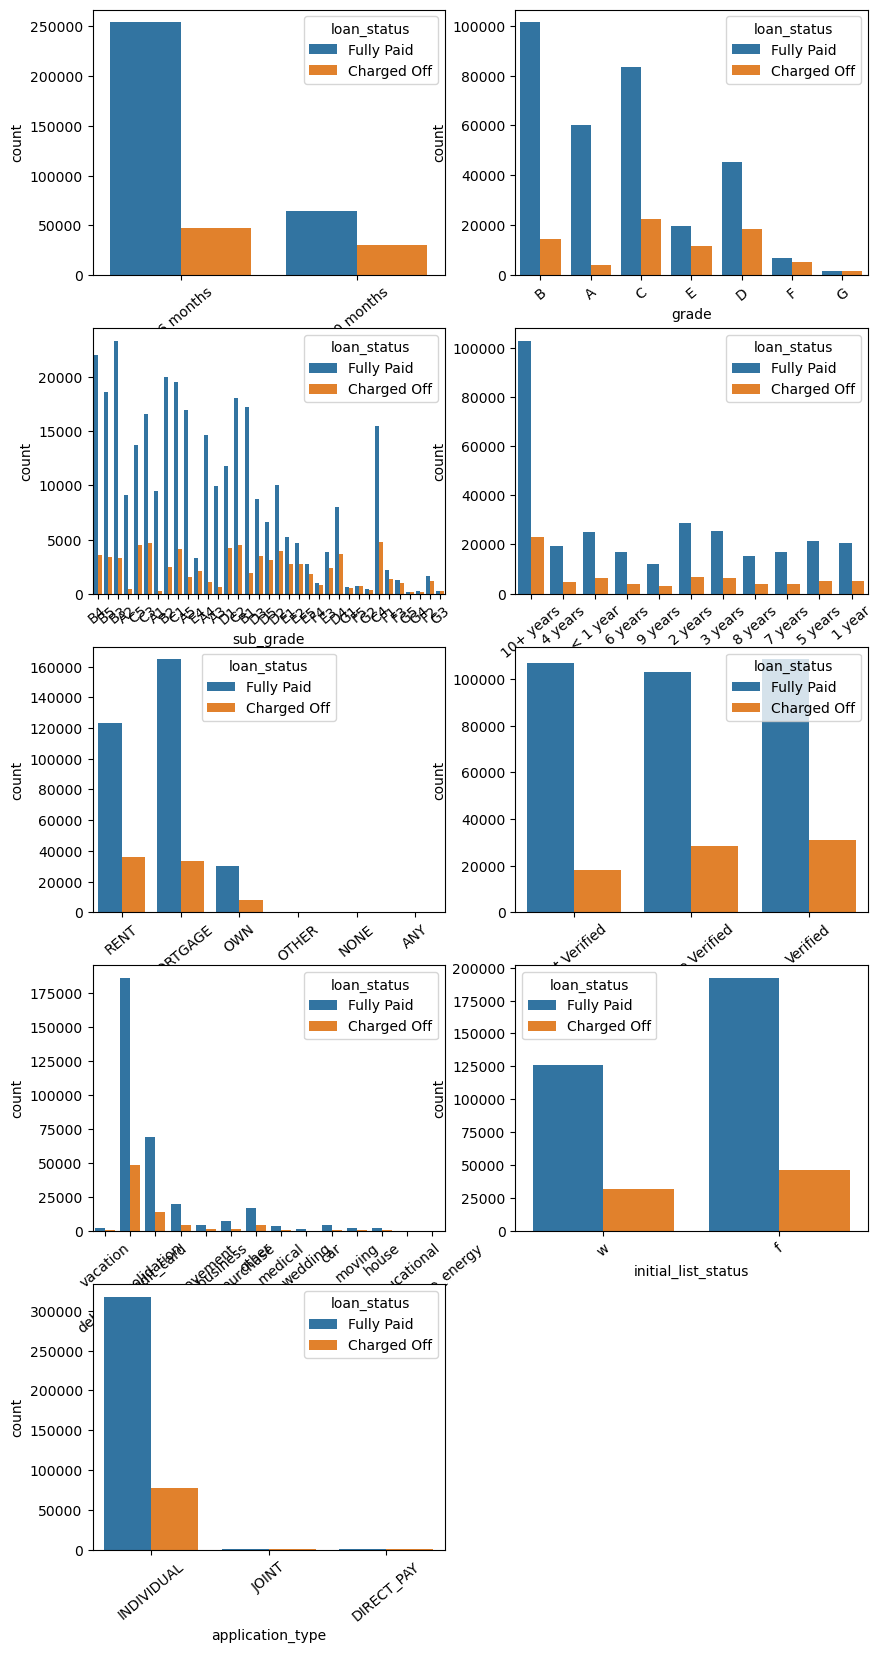

In [264]:
cat_var=['term','grade','sub_grade','emp_length','home_ownership','verification_status','purpose','initial_list_status','application_type']
l=len(cat_var)
plt.figure(figsize=(10,20))
n=1
for i in cat_var:
    plt.subplot((l+1)//2,2,n)
    n+=1
    sns.countplot(data=df,x=i,hue='loan_status')
    plt.xticks(rotation=40)

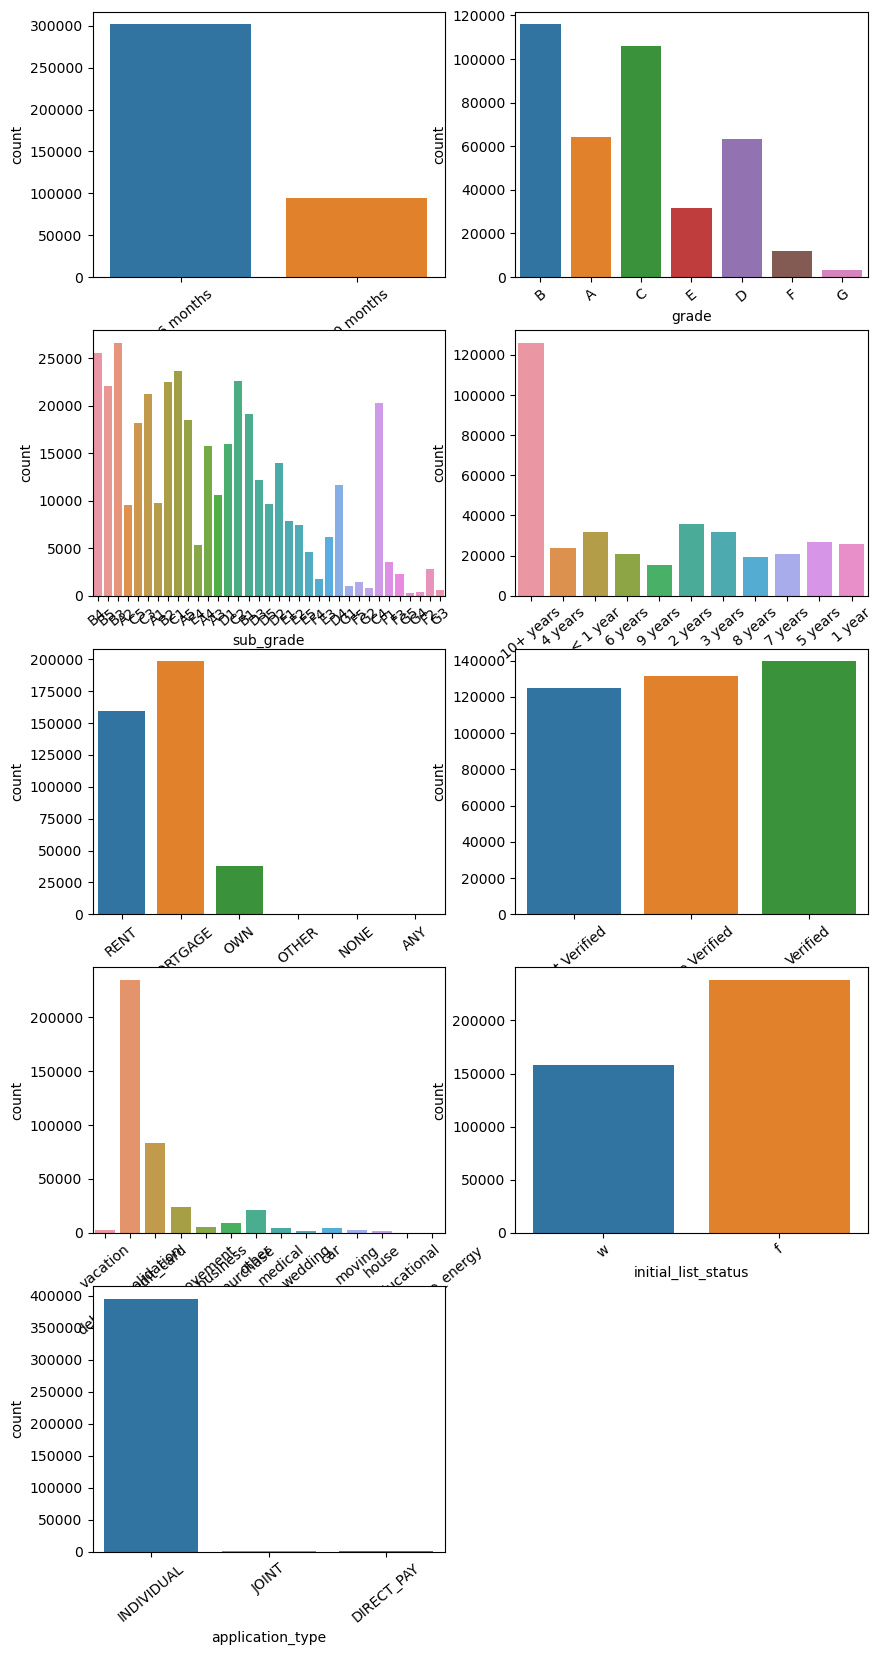

In [265]:
cat_var=['term','grade','sub_grade','emp_length','home_ownership','verification_status','purpose','initial_list_status','application_type']
l=len(cat_var)
plt.figure(figsize=(10,20))
n=1
for i in cat_var:
    plt.subplot((l+1)//2,2,n)
    n+=1
    sns.countplot(data=df,x=i)
    plt.xticks(rotation=40)

In [266]:
df['default']=df['loan_status'].map({'Fully Paid':0, 'Charged Off':1})

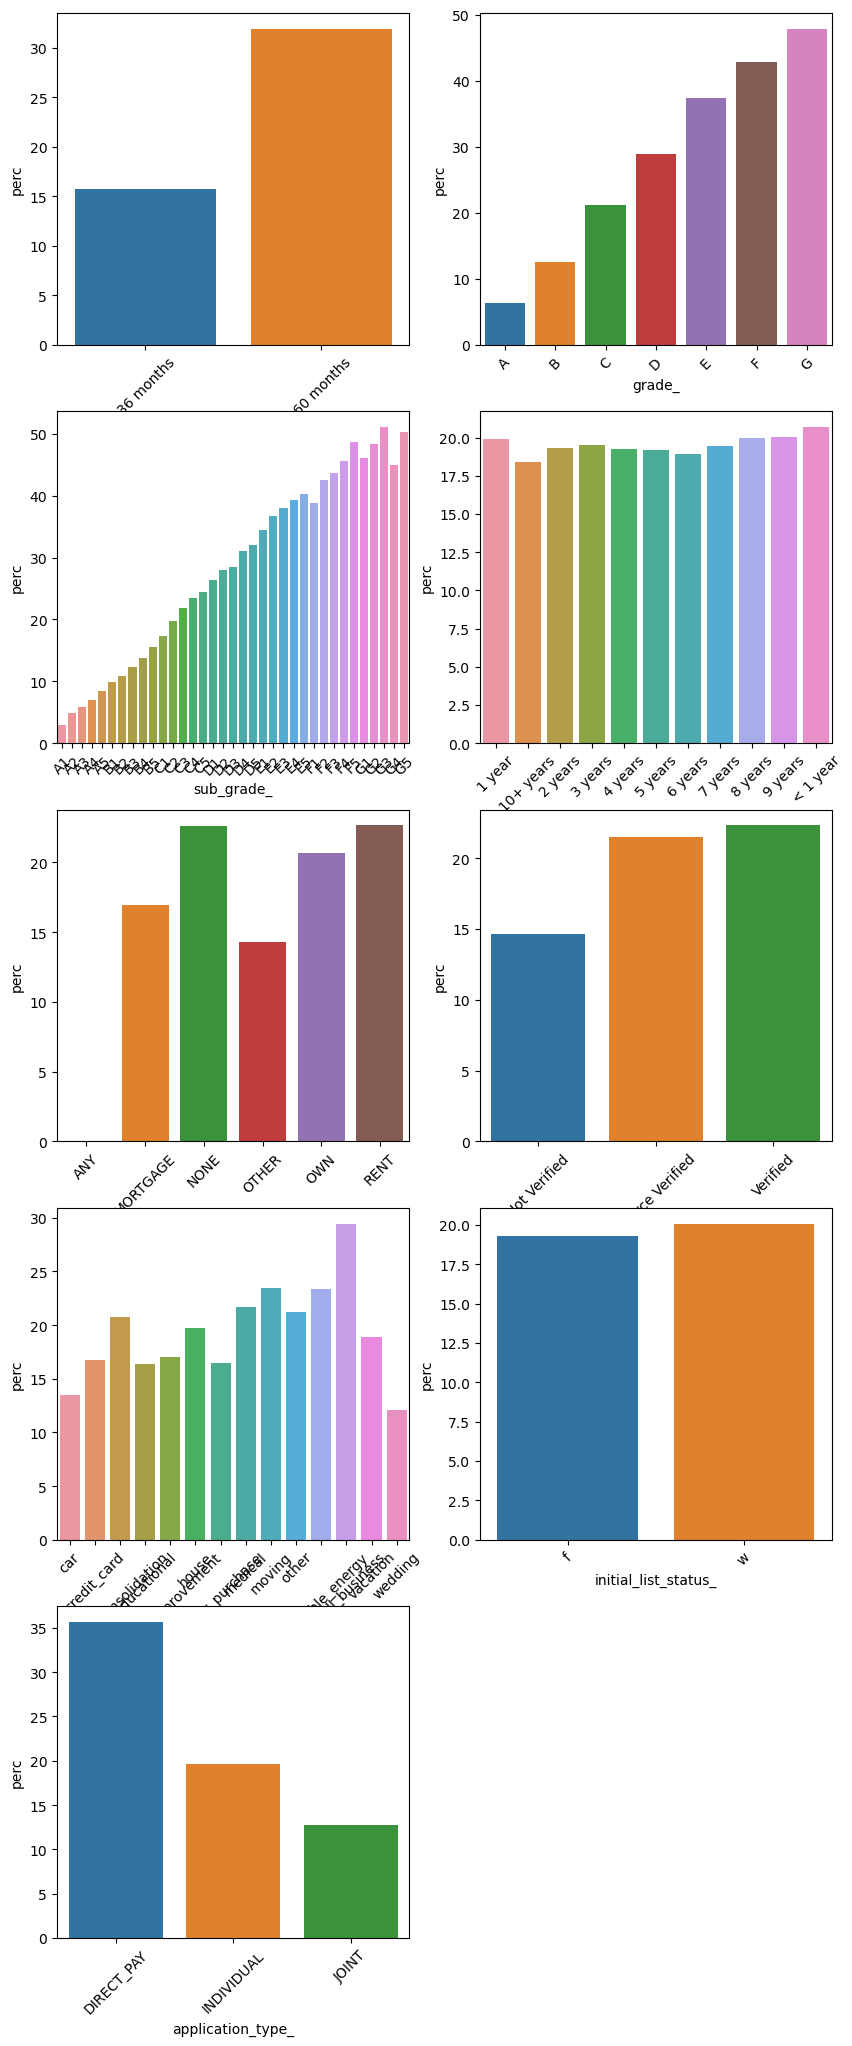

In [267]:
##lets calculate the percentage of defaults in these categories
plt.figure(figsize=(10,25))
n=1
for i in cat_var:
    df1=df.groupby(i).agg({'default':['sum','count']}).reset_index()
    df1.columns=[x+'_'+y for x,y in df1.columns]
    df1['perc']=df1['default_sum']/df1['default_count']*100
    df1['perc']=round(df1['perc'],2)
    plt.subplot((l+1)//2,2,n)
    n+=1
    col=i+'_'
    sns.barplot(data=df1,x=col,y='perc')
    #s='Percentage of default '+i
    #plt.title(s)
    plt.xticks(rotation=45)

# Observations
### 1.Grade :Percentage of default will increase from grade A loan to grade G loans.grade A loans are the best performing loans and grade G is the worst performing loans
### 2.Subgrades follows the similar trends as of feature grade
### 3.Loans with term 60 months are having higher default percentage.
### 4.The number of defaults is same across the different years of employments
### 5.Direct pay loans are the worst performing loans with defaulting percentage of 35%.The data is very less to arrive at conclusion
### 6.verification status:this column is showing some anomaly.The verified loans were expected to perform better when compared to not verified loans.But ,here the verified loans are relatively performing badly .

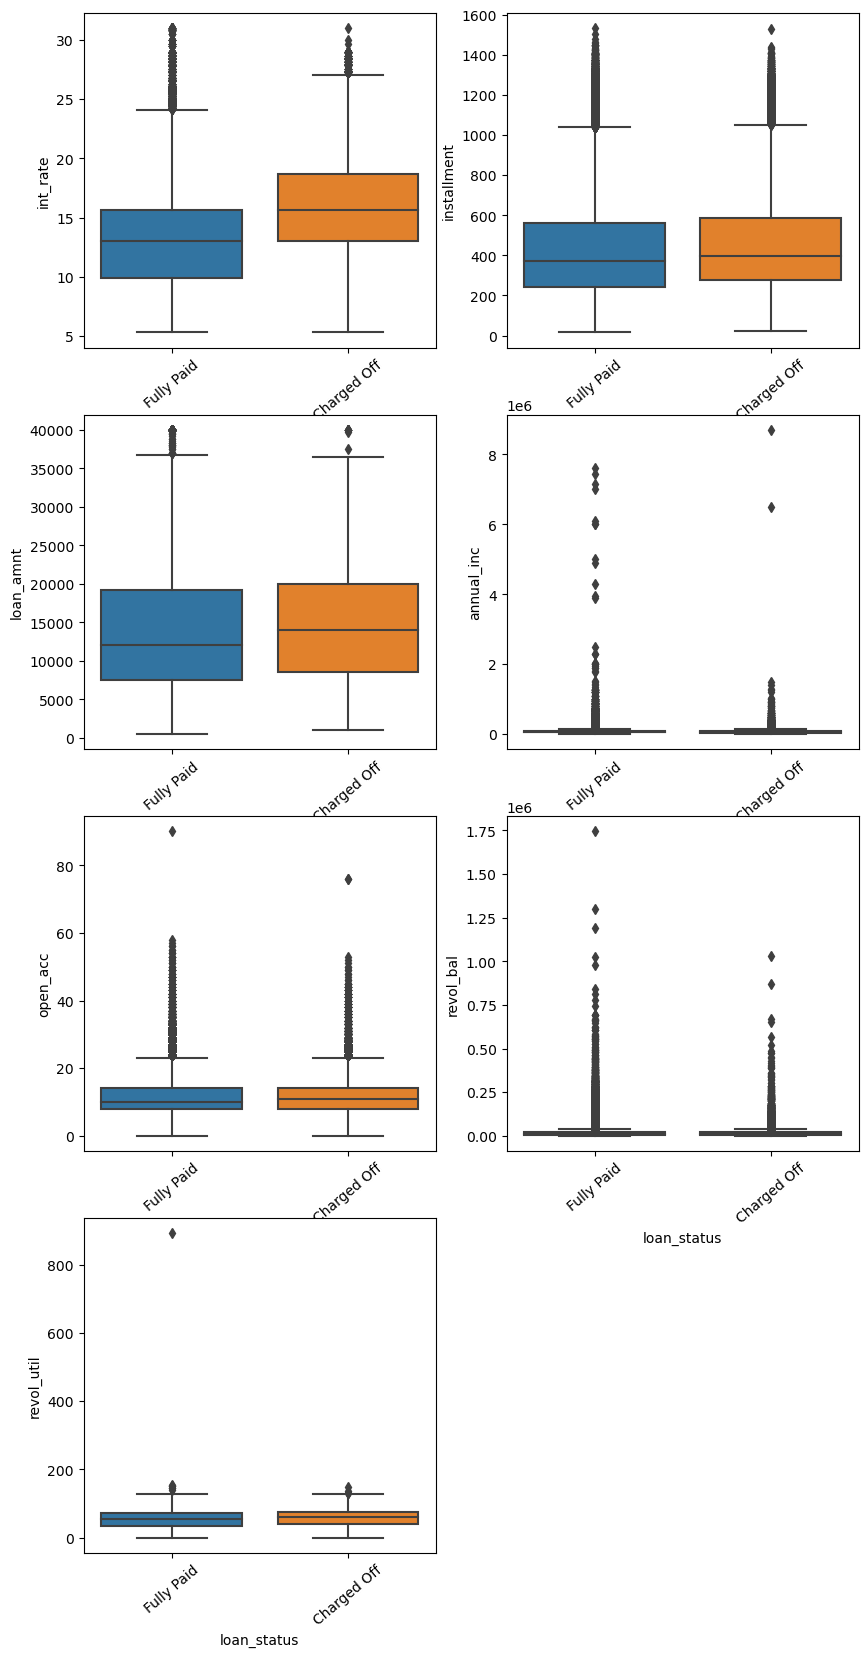

In [268]:
nom_var=['int_rate','installment','loan_amnt','annual_inc','open_acc','revol_bal','revol_util']
l=len(nom_var)
plt.figure(figsize=(10,20))
n=1
for i in nom_var:
    plt.subplot((l+1)//2,2,n)
    n+=1
    sns.boxplot(data=df,y=i,x='loan_status')
    plt.xticks(rotation=40)

# Observations:
## 1.Chance of default is higher for the higher rate of interest
## 2.Chance of default is high for the higher loan amount
## 3.Large number of outliers are observed in each of these columns.we can remove these outliers using z score method(eliminate the rows whos values greater than (mean+3*std) and value<(mean-3*std))

# Outlier treatment

In [269]:
data=df.copy()
for i in nom_var:
    mean=np.mean(data[i])
    std=np.std(data[i])
    data=data[(data[i]<(mean+3*std))&(data[i]>(mean-3*std))]

In [270]:
df=data.copy()
df.shape

(377304, 28)

# Null value treatment

In [271]:
df.isnull().sum()/df.shape[0]*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.839853
emp_length              4.721127
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.426447
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.000000
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.733796
pub_rec_bankruptcies    0.136495
address                 0.000000
default                 0.000000
dtype: float64

In [272]:
#mort_account column have maximum amount of null values(9.73%)
#lets try to fill null values in mort_acc column
#we can fill the mean mort_acc for the corresponding total_acc
#lets group the data by total_acc
df1=df.groupby('total_acc')['mort_acc'].mean().reset_index()
df=pd.merge(left=df,right=df1,on='total_acc')
df.head(2)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc_x,pub_rec_bankruptcies,address,default,mort_acc_y
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",0,1.863882
1,18000.0,36 months,5.32,542.07,A,A1,Software Development Engineer,2 years,MORTGAGE,125000.0,Source Verified,Sep-2015,Fully Paid,home_improvement,Home improvement,1.36,Aug-2005,8.0,0.0,4178.0,4.9,25.0,f,INDIVIDUAL,3.0,0.0,"1008 Erika Vista Suite 748\r\nEast Stephanie, ...",0,1.863882


In [273]:
df['mort_acc']=df[['mort_acc_x','mort_acc_y']].bfill(axis=1).iloc[:,0]

In [274]:
df.drop(columns=['mort_acc_x','mort_acc_y'],inplace=True)

In [275]:
df.isnull().sum()/df.shape[0]*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.839853
emp_length              4.721127
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.426447
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.000000
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
pub_rec_bankruptcies    0.136495
address                 0.000000
default                 0.000000
mort_acc                0.000000
dtype: float64

In [276]:
#dropping the rows which contains null values
df.dropna(inplace=True)
df.shape

(353203, 28)

# Feature Engineering

In [277]:
##column=='term' contains only 2 variables.those are 36 months and 60 months.
#we can go for binary encoding 
df['term'].value_counts()

 36 months    267539
 60 months     85664
Name: term, dtype: int64

In [278]:
df['term']=df['term'].apply(lambda x:1 if x==' 36 months' else 0)

In [279]:
##subgrade column is the combination of grade and respective subgrades.
#lets extract the second term from each entry of the sub grade category.
#we can combine the extracted subgrade and grade to get original subgrade.This method will also reduce the dimensions
def sub_grade(s):
    return int(s[1])
df['sub_grade']=df['sub_grade'].apply(sub_grade)

In [280]:
df['emp_length'].value_counts()
##the datapoints are equally distributed across different categories.
#we can get the dummies these values

10+ years    116510
2 years       33733
< 1 year      29780
3 years       29675
5 years       24890
1 year        24365
4 years       22496
6 years       19663
7 years       19637
8 years       18059
9 years       14395
Name: emp_length, dtype: int64

In [281]:
df['home_ownership'].value_counts()
##here the minority class 'OTHER','NONE',and 'ANY' can be converged into one group called as 'Other'

MORTGAGE    174687
RENT        146695
OWN          31689
OTHER          103
NONE            28
ANY              1
Name: home_ownership, dtype: int64

In [282]:
df['home_ownership']=df['home_ownership'].apply(lambda x:'other' if x in ('OTHER','NONE','ANY') else x)

In [283]:
df['verification_status'].value_counts()
##NO changes are needed for this column.Dummies can be created in future while building the model.

Source Verified    119202
Not Verified       119105
Verified           114896
Name: verification_status, dtype: int64

In [284]:
#variables in issue_d column are in 'Object' datatype.
#lets convert them into datetime format
df['issue_d']=pd.to_datetime(df['issue_d'])
df.head(2)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,pub_rec_bankruptcies,address,default,mort_acc
0,10000.0,1,11.44,329.48,B,4,Marketing,10+ years,RENT,117000.0,Not Verified,2015-01-01,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",0,0.0
1,18000.0,1,5.32,542.07,A,1,Software Development Engineer,2 years,MORTGAGE,125000.0,Source Verified,2015-09-01,Fully Paid,home_improvement,Home improvement,1.36,Aug-2005,8.0,0.0,4178.0,4.9,25.0,f,INDIVIDUAL,0.0,"1008 Erika Vista Suite 748\r\nEast Stephanie, ...",0,3.0


In [285]:
df['loan_status'].value_counts()

Fully Paid     285345
Charged Off     67858
Name: loan_status, dtype: int64

In [286]:
#doing binary encoding for the column loan status
#lets assign 1 fromm fully_paid and 0 for Charged Off
df['loan_status']=df['loan_status'].map({'Fully Paid':0,'Charged Off':1})
df.head(2)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,pub_rec_bankruptcies,address,default,mort_acc
0,10000.0,1,11.44,329.48,B,4,Marketing,10+ years,RENT,117000.0,Not Verified,2015-01-01,0,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",0,0.0
1,18000.0,1,5.32,542.07,A,1,Software Development Engineer,2 years,MORTGAGE,125000.0,Source Verified,2015-09-01,0,home_improvement,Home improvement,1.36,Aug-2005,8.0,0.0,4178.0,4.9,25.0,f,INDIVIDUAL,0.0,"1008 Erika Vista Suite 748\r\nEast Stephanie, ...",0,3.0


In [287]:
df[['title','purpose']].nunique()

title      44312
purpose       14
dtype: int64

In [288]:
df['purpose'].value_counts()

debt_consolidation    211154
credit_card            73923
home_improvement       20502
other                  18634
major_purchase          7814
small_business          4393
car                     4268
medical                 3665
moving                  2544
vacation                2198
house                   1898
wedding                 1701
renewable_energy         290
educational              219
Name: purpose, dtype: int64

In [289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 353203 entries, 0 to 377303
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   loan_amnt             353203 non-null  float64       
 1   term                  353203 non-null  int64         
 2   int_rate              353203 non-null  float64       
 3   installment           353203 non-null  float64       
 4   grade                 353203 non-null  object        
 5   sub_grade             353203 non-null  int64         
 6   emp_title             353203 non-null  object        
 7   emp_length            353203 non-null  object        
 8   home_ownership        353203 non-null  object        
 9   annual_inc            353203 non-null  float64       
 10  verification_status   353203 non-null  object        
 11  issue_d               353203 non-null  datetime64[ns]
 12  loan_status           353203 non-null  int64         
 13 

In [290]:
df['earliest_cr_line']=pd.to_datetime(df['earliest_cr_line'])
#converting the data type from object to datetime format

In [291]:
# columns pub_rec,mort_acc,pub_rec_bankrupties.These columns indicates the number of default records of the particular customers.
#we can assign 1 if the defaulting record is present ,other wise we can assign 0 for these values
def present(s):
    if s>0:
        return 1
    else:
        return 0
df['pub_rec']=df['pub_rec'].apply(present)
df['mort_acc']=df['mort_acc'].apply(present)
df['pub_rec_bankruptcies']=df['pub_rec_bankruptcies'].apply(present)

In [292]:
df['application_type'].value_counts()

INDIVIDUAL    352721
JOINT            282
DIRECT_PAY       200
Name: application_type, dtype: int64

In [293]:
#lets check loan defaulters distribution among the application_type!='INDIVIDUAL'
df[df['application_type']!='INDIVIDUAL'].groupby(['application_type','loan_status'])['loan_amnt'].count()
##NO need to merge application type='joint' or 'direct_pay'.we can create sparse matrix using get_dummies function

application_type  loan_status
DIRECT_PAY        0              144
                  1               56
JOINT             0              254
                  1               28
Name: loan_amnt, dtype: int64

In [294]:
#from address column,zip code can be fetched and this might help in building the model
def zip_code(s):
    s=s.split()
    return str(s[-1])
df['zip_code']=df['address'].apply(zip_code)

In [295]:
df['initial_list_status']=df['initial_list_status'].map({'w':1,'f':0})
df.head(2)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,pub_rec_bankruptcies,address,default,mort_acc,zip_code
0,10000.0,1,11.44,329.48,B,4,Marketing,10+ years,RENT,117000.0,Not Verified,2015-01-01,0,vacation,Vacation,26.24,1990-06-01,16.0,0,36369.0,41.8,25.0,1,INDIVIDUAL,0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",0,0,22690
1,18000.0,1,5.32,542.07,A,1,Software Development Engineer,2 years,MORTGAGE,125000.0,Source Verified,2015-09-01,0,home_improvement,Home improvement,1.36,2005-08-01,8.0,0,4178.0,4.9,25.0,0,INDIVIDUAL,0,"1008 Erika Vista Suite 748\r\nEast Stephanie, ...",0,1,22690


In [296]:
##lets drop few columns which are of no use as of now
drop_col=['sub_grade','emp_title','issue_d','title','earliest_cr_line','address','emp_length']
df.drop(columns=drop_col,inplace=True)
df.head(2)

,loan_amnt,term,int_rate,installment,grade,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,pub_rec_bankruptcies,default,mort_acc,zip_code
0,10000.0,1,11.44,329.48,B,RENT,117000.0,Not Verified,0,vacation,26.24,16.0,0,36369.0,41.8,25.0,1,INDIVIDUAL,0,0,0,22690
1,18000.0,1,5.32,542.07,A,MORTGAGE,125000.0,Source Verified,0,home_improvement,1.36,8.0,0,4178.0,4.9,25.0,0,INDIVIDUAL,0,0,1,22690


In [297]:
df.drop(columns='default',inplace=True)

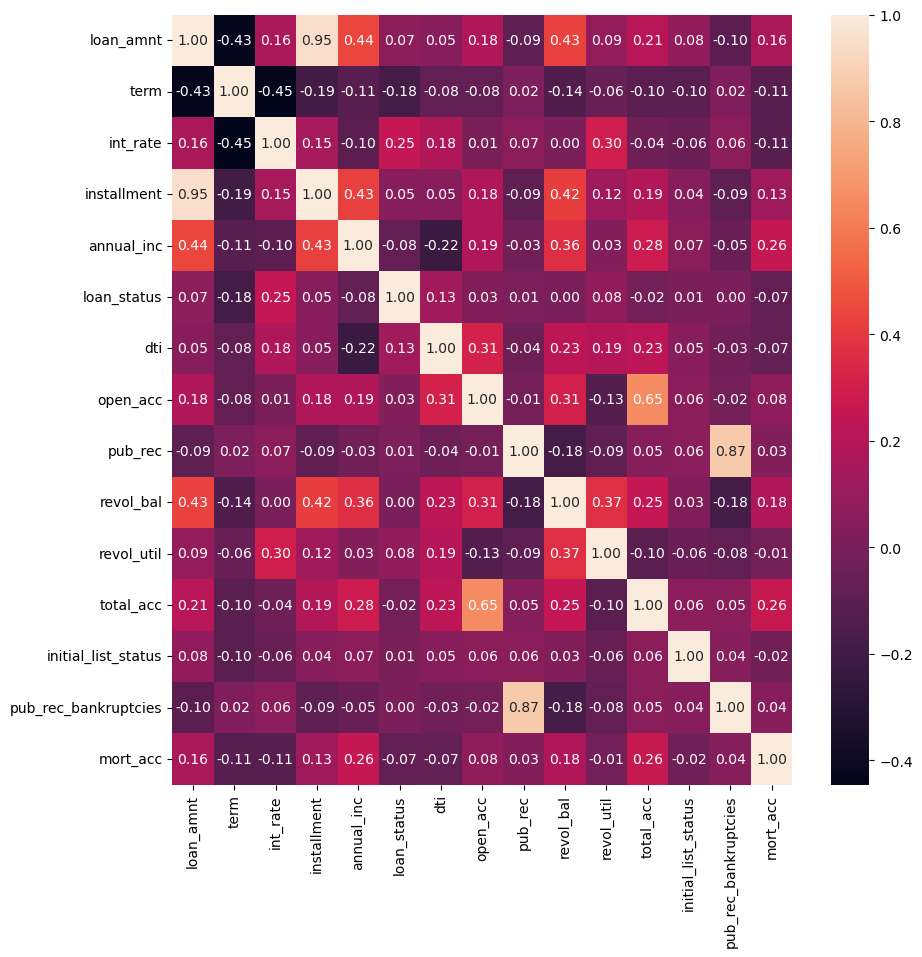

In [298]:
##lets check whether we can drop any more column based on the correlation of variables
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt='.2f')
##loan amount and installment is highly correlated .any one of the columns can be removed from the dataframe
##pub_rec_bankruptcies and pub_rec variables are highly correlated.either of these columns can be removed from the dataframe
df.drop(columns=['installment','pub_rec_bankruptcies'],inplace=True)

In [299]:
#since there is no null values in the dataframe.first column of the dummies can be dropped
df=pd.get_dummies(df,columns=['grade','home_ownership','verification_status','purpose','application_type','zip_code'],drop_first=True)

In [300]:

df.head(2)

,loan_amnt,term,int_rate,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,mort_acc,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_OWN,home_ownership_RENT,home_ownership_other,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,application_type_INDIVIDUAL,application_type_JOINT,zip_code_05113,zip_code_11650,zip_code_22690,zip_code_29597,zip_code_30723,zip_code_48052,zip_code_70466,zip_code_86630,zip_code_93700
0,10000.0,1,11.44,117000.0,0,26.24,16.0,0,36369.0,41.8,25.0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0
1,18000.0,1,5.32,125000.0,0,1.36,8.0,0,4178.0,4.9,25.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0


# Preparing  data for Logistic Regression

In [301]:
#splitting the data as training and testing data
from sklearn.model_selection import train_test_split
X=df.drop(columns='loan_status')
y=df['loan_status']

In [302]:
x_train,x_test,y_train,y_test=train_test_split(X,y)
print(x_train.shape)
print(y_train.shape)

(264902, 47)
(264902,)


In [303]:
# Apply min max scaling on the xtrain and xtest 
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

# Logistic Regression

In [304]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=1000)
lr.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [305]:
accuracy_score=lr.score(x_test,y_test)
print(f'Accuracy score is:{accuracy_score}')

Accuracy score is:0.8903296678406813


In [306]:
from sklearn.metrics import confusion_matrix
y_pred=lr.predict(x_test)
print(confusion_matrix(y_test,y_pred))

[[70824   397]
 [ 9287  7793]]


In [307]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))
## 1 indicates charged off loans.The model is able to recognise the charged off loans with precision of 95%

              precision    recall  f1-score   support

           0       0.88      0.99      0.94     71221
           1       0.95      0.46      0.62     17080

    accuracy                           0.89     88301
   macro avg       0.92      0.73      0.78     88301
weighted avg       0.90      0.89      0.87     88301



# check the performance of model for different cutoff thresholds

## ROC-AUC (Reciever operating characteristics-Areas under the curve)

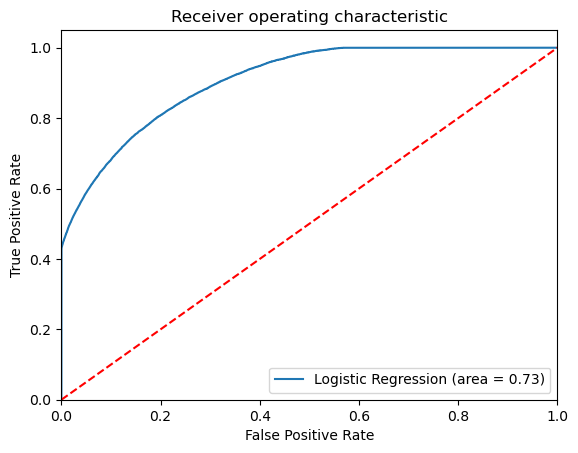

In [310]:
from sklearn.metrics import roc_auc_score,roc_curve
logit_roc_auc = roc_auc_score(y_test, lr.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
##These curves are used to choose the best model in case of multiple models were built.
#Performance of the model is determined by area under the curve

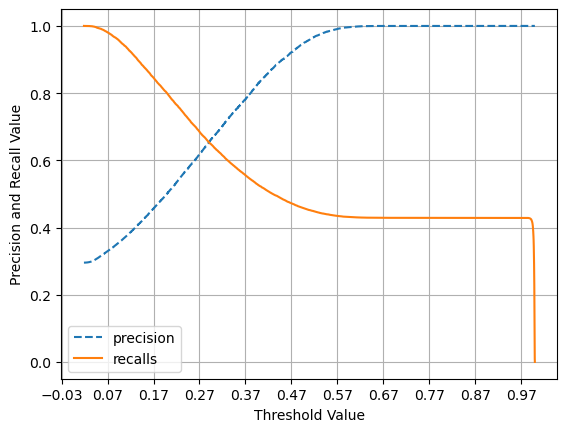

In [312]:
from sklearn.metrics import precision_recall_curve
def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

    threshold_boundary = thresholds.shape[0]
    # plot precision
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    # plot recall
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recalls')

    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))

    plt.xlabel('Threshold Value'); plt.ylabel('Precision and Recall Value')
    plt.legend(); plt.grid()
    plt.show()

precision_recall_curve_plot(y_test, lr.predict_proba(x_test)[:,1])
#precision and recall graph for different thresholds is usefull in deciding the optimum threshold value to achieve best possible 
#f1 value.
#

# Multicollinearity Check using VIF

In [314]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
    # Calculating the VIF
    vif = pd.DataFrame()
    vif['Feature'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by='VIF', ascending = False)
    return vif

calc_vif(X)[:5]

,Feature,VIF
36,application_type_INDIVIDUAL,146.32
2,int_rate,121.35
24,purpose_debt_consolidation,49.55
23,purpose_credit_card,18.01
5,open_acc,13.80


In [316]:
#for feature application_type_INDIVIDUAL:the vif score is very high
#we can drop this column from the dataframe and repeat the vif test
X.drop(columns=['application_type_INDIVIDUAL'],inplace=True)
calc_vif(X)[:5]

,Feature,VIF
2,int_rate,97.39
24,purpose_debt_consolidation,28.65
5,open_acc,13.71
9,total_acc,11.51
23,purpose_credit_card,10.54


In [317]:
X.drop(columns=['int_rate'],inplace=True)
calc_vif(X)[:5]

,Feature,VIF
23,purpose_debt_consolidation,22.00
4,open_acc,13.61
8,total_acc,11.51
7,revol_util,9.16
22,purpose_credit_card,8.25


In [318]:
X.drop(columns=['purpose_debt_consolidation'],inplace=True)
calc_vif(X)[:5]

,Feature,VIF
4,open_acc,13.25
8,total_acc,11.49
7,revol_util,8.73
2,annual_inc,7.92
3,dti,7.69


In [319]:
X.drop(columns=['open_acc'],inplace=True)
calc_vif(X)[:5]
##the vif is less than 10 for all features.There is no need of further vif calculations.

,Feature,VIF
6,revol_util,8.31
2,annual_inc,7.86
7,total_acc,7.53
3,dti,7.23
0,loan_amnt,7.05


In [323]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
X = scaler.fit_transform(X)

kfold = KFold(n_splits=5)
accuracy = np.mean(cross_val_score(lr, X, y, cv=kfold, scoring='accuracy', n_jobs=-1))
print("Cross Validation accuracy: {:.3f}".format(accuracy))
#There is a increase in accuracy score after removing features with multicollinearity

Cross Validation accuracy: 0.891


# Imbalance data: Class weight method

In [329]:
2*df.shape[0]/df['loan_status'].value_counts()
#penalty weights are calculated by (total_sample_size*no_features)/(no_of_samples)

0     2.475621
1    10.410062
Name: loan_status, dtype: float64

In [355]:
lr=LogisticRegression(class_weight={0:0.2,1:0.8},max_iter=1000)
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

0.8078504207200371

In [356]:
y_pred=lr.predict(x_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.81      0.87     71221
           1       0.50      0.80      0.62     17080

    accuracy                           0.81     88301
   macro avg       0.72      0.80      0.74     88301
weighted avg       0.86      0.81      0.82     88301

[[57715 13506]
 [ 3461 13619]]


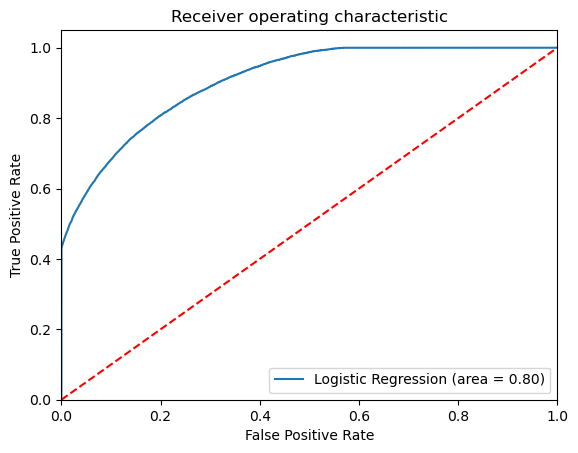

In [357]:
logit_roc_auc = roc_auc_score(y_test, lr.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
#area under the roc curve has slighly decreased when compared to previous model

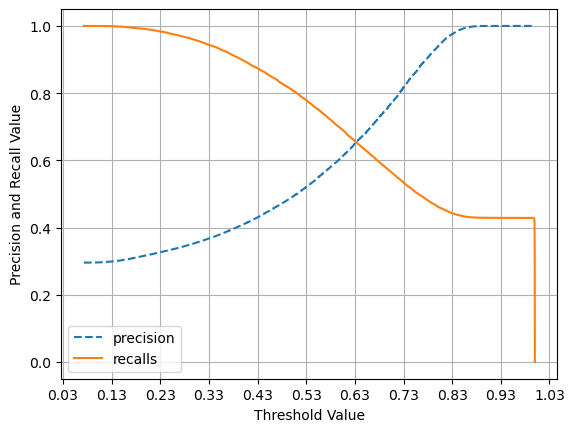

In [353]:
def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

    threshold_boundary = thresholds.shape[0]
    # plot precision
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    # plot recall
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recalls')

    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))

    plt.xlabel('Threshold Value'); plt.ylabel('Precision and Recall Value')
    plt.legend(); plt.grid()
    plt.show()
precision_recall_curve_plot(y_test, lr.predict_proba(x_test)[:,1])
#There is a shift in threshold value at which the precision and recall scores converges

# SMOTE

In [361]:
!pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
  Using cached imbalanced_learn-0.12.3-py3-none-any.whl (258 kB)
  Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [362]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, the shape of train_X: (428248, 47)
After OverSampling, the shape of train_y: (428248,) 

After OverSampling, counts of label '1': 214124
After OverSampling, counts of label '0': 214124


In [364]:
lr1 = LogisticRegression(max_iter=1000)
lr1.fit(X_train_res, y_train_res)
predictions = lr1.predict(x_test)

# Classification Report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.80      0.87     71221
           1       0.49      0.81      0.61     17080

    accuracy                           0.80     88301
   macro avg       0.72      0.80      0.74     88301
weighted avg       0.86      0.80      0.82     88301



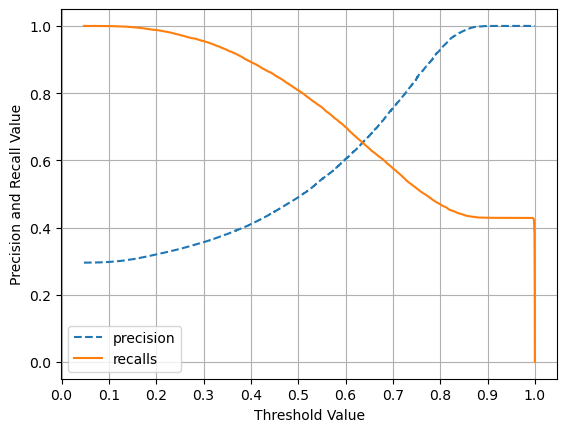

In [366]:
def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

    threshold_boundary = thresholds.shape[0]
    # plot precision
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    # plot recall
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recalls')

    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))

    plt.xlabel('Threshold Value'); plt.ylabel('Precision and Recall Value')
    plt.legend(); plt.grid()
    plt.show()

precision_recall_curve_plot(y_test, lr1.predict_proba(x_test)[:,1])

# Recommendations

#### 1. Recall=(TP)/(TP+FN),In this case study,we need to focus more on recall.Because failing to identify the defaulting customers may lead to increase in bad debt.
#### 2.At the same time the precision score is also important,Because branding the good customers as defaulting customers may leads to missed opportunity to lend the loan.This will affect the overall disbursment.
#### 3.loan for term=60 months is not performing well when compared to 30 months term loan.Focus on short term lending instead of long term loans
#### 4.Direct pay loans have highest default percentage.Try to reduce number of loan under this category.
#### 5.Other classification models like decision tree,random forest and boosting can be used for classification